In [82]:
car_img_path="/content/car.jpeg"

In [83]:
car_img_path

'/content/car.jpeg'

In [84]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2#opencv

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
img = cv2.imread(car_img_path)

In [87]:
img

array([[[  0,   0,   0],
        [  2,   2,   2],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  3,   3,   3],
        [  0,   0,   0]],

       [[243, 243, 243],
        [238, 238, 238],
        [228, 228, 228],
        ...,
        [221, 221, 221],
        [220, 220, 220],
        [210, 210, 210]],

       [[255, 255, 255],
        [255, 255, 255],
        [241, 241, 241],
        ...,
        [239, 239, 239],
        [236, 236, 236],
        [223, 223, 223]],

       ...,

       [[254, 254, 254],
        [253, 253, 253],
        [239, 239, 239],
        ...,
        [213, 213, 213],
        [211, 211, 211],
        [200, 200, 200]],

       [[255, 255, 255],
        [255, 255, 255],
        [242, 242, 242],
        ...,
        [214, 214, 214],
        [212, 212, 212],
        [201, 201, 201]],

       [[254, 254, 254],
        [253, 253, 253],
        [239, 239, 239],
        ...,
        [202, 202, 202],
        [201, 201, 201],
        [190, 190, 190]]

In [88]:
img.shape

(277, 499, 3)

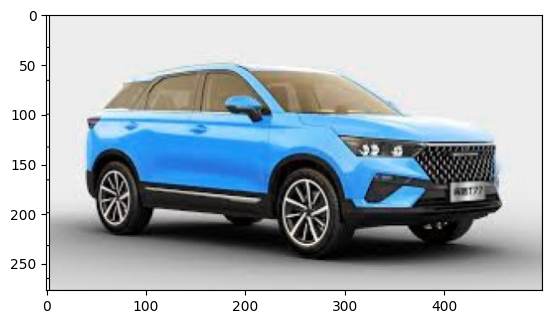

In [89]:
plt.imshow(img) #by default RGB channel is showing in BGR format so car is blue instead of orange

In [90]:
img2=cv2.cvtColor(img,cv2. COLOR_BGR2RGB) # converting RGB channel from BGR to RGB

In [91]:
img2.shape

(277, 499, 3)

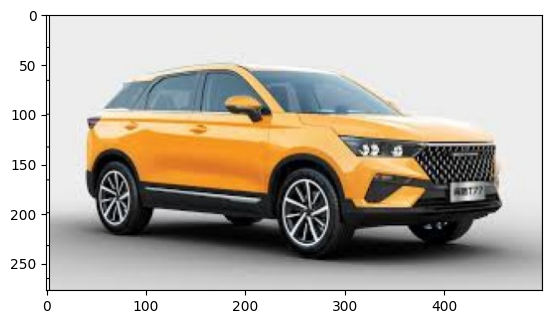

In [92]:
plt.imshow(img2)

In [93]:
img3=cv2.cvtColor(img2,cv2. COLOR_BGR2GRAY)

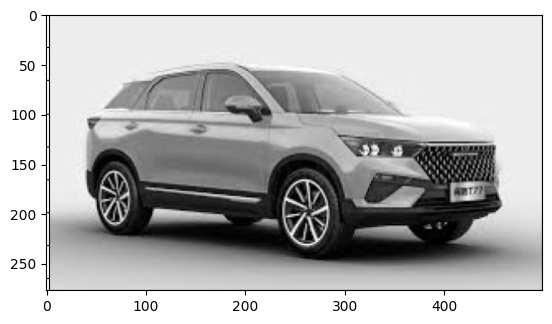

In [94]:
plt.imshow(img3,cmap="gray")

In [95]:
img3.shape # gray image has 2d array black and white only..

(277, 499)

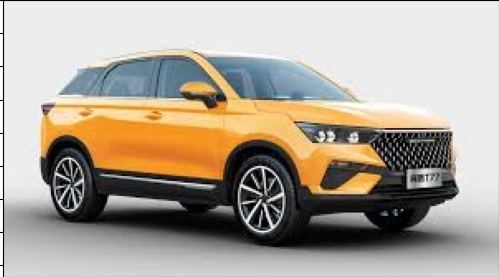

In [96]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [97]:
row,col=img3.shape

In [98]:
car=img3.reshape(1,row,col,1) # 2d black n white image

In [99]:
car.shape

(1, 277, 499, 1)

In [100]:
reshaped_color_img=color_car.reshape(1,row,col,depth) # converting into 3d array -> 1 -> no of rows, row,col size of image, depth is dimenssion of image..

In [101]:
reshaped_color_img.shape

(1, 277, 499, 3)

In [102]:
reshaped_color_img.shape[1:]

(277, 499, 3)

In [103]:
#creating first CNN over image with filter size 3
Conv_layer=[tf.keras.layers.Conv2D(
    filters=2,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=reshaped_color_img.shape[1:]
)]

In [104]:
conv_model=tf.keras.Sequential(Conv_layer)

In [105]:
conv_model.summary() #total trainable prameter are 28 - 3*3(kernel size)+1 bias

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 275, 497, 2)       56        
                                                                 
Total params: 56 (224.00 Byte)
Trainable params: 56 (224.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
output=conv_model.predict(car)

ValueError: ignored